In [2]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [3]:
import seaborn as sns
from prettytable import PrettyTable

In [1]:
!pip install prettytable

In [4]:
data=pd.read_csv("parkinsson disease.csv")
print(data.iloc[[0]])

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007    0.0037   0.00554     0.01109       0.04374  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  

[1 rows x 24 columns]


In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

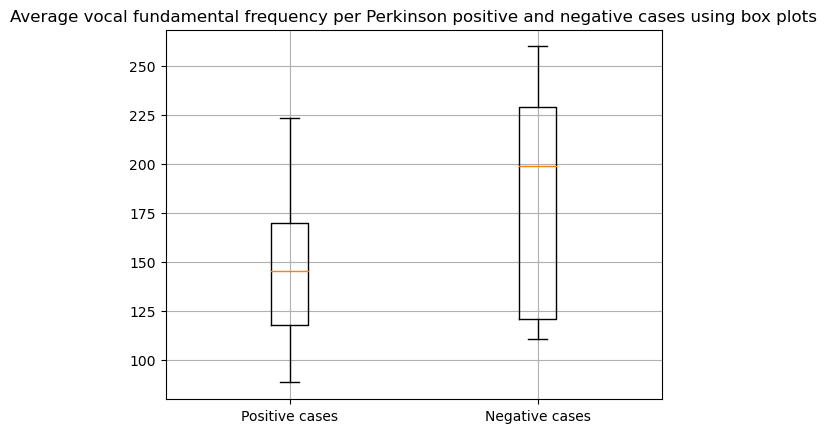

C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


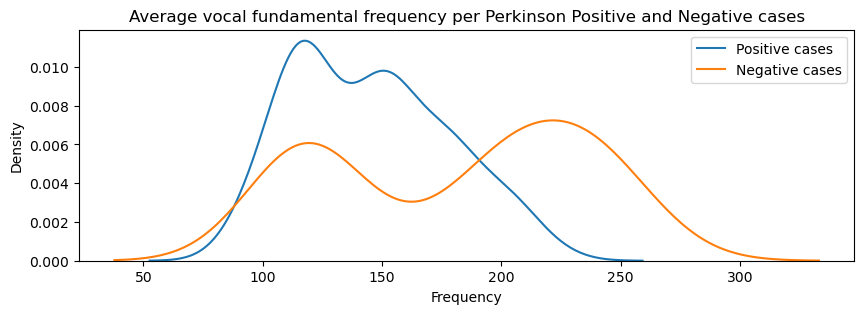

+------------+----------------+----------------+
| Percentile | Positive cases | Negative cases |
+------------+----------------+----------------+
|     0      |     88.333     |    110.739     |
|     5      |     99.394     |    114.012     |
|     10     |    109.439     |    116.014     |
|     15     |    112.136     |    116.396     |
|     20     |    114.942     |     116.91     |
|     25     |    117.572     |    120.948     |
|     30     |    120.061     |    124.635     |
|     35     |    122.342     |    128.602     |
|     40     |    128.138     |    174.588     |
|     45     |    138.878     |    197.691     |
|     50     |    145.174     |    198.996     |
|     55     |    149.728     |    201.728     |
|     60     |    151.975     |    204.376     |
|     65     |    154.971     |    212.141     |
|     70     |    159.806     |    223.252     |
|     75     |    170.071     |    229.077     |
|     80     |    176.715     |    236.816     |
|     85     |    18

In [7]:
#frequency plotting positive vs negative cases in the dataset
affected_freq_avg= data[data['status']==1]['MDVP:Fo(Hz)'].values
not_affected_freq_avg= data[data['status']==0]['MDVP:Fo(Hz)'].values
plt.boxplot([affected_freq_avg,not_affected_freq_avg])
plt.title('Average vocal fundamental frequency per Perkinson positive and negative cases using box plots')
plt.xticks([1,2],('Positive cases','Negative cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

sns.distplot(affected_freq_avg, hist=False, label="Positive cases")
sns.distplot(not_affected_freq_avg, hist=False, label="Negative cases")
plt.title('Average vocal fundamental frequency per Perkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

x= PrettyTable()
x.field_names=["Percentile","Positive cases","Negative cases"]
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(affected_freq_avg,i),3), np.round(np.percentile(not_affected_freq_avg,i),3)])
print(x)

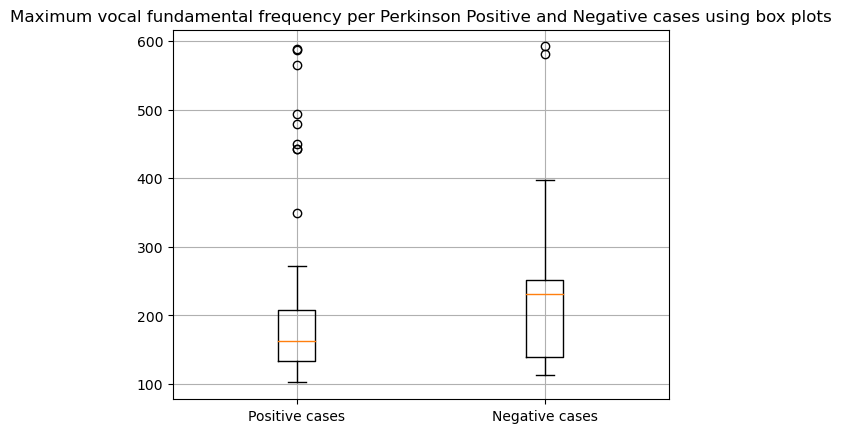

C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


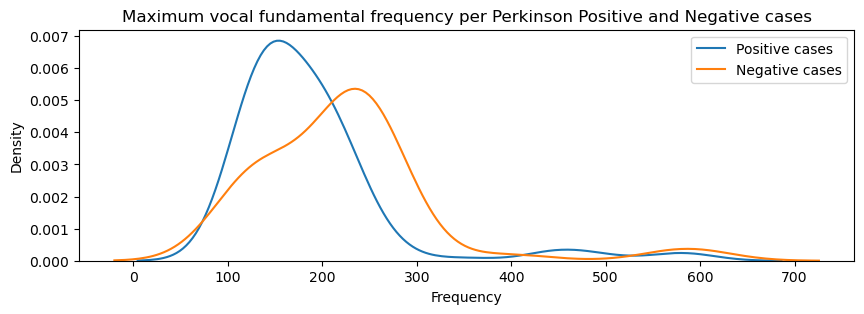

+------------+----------------+----------------+
| percentile | Positive cases | Negative cases |
+------------+----------------+----------------+
|     0      |    102.145     |    113.597     |
|     5      |    114.397     |    120.547     |
|     10     |    125.269     |    127.205     |
|     15     |    127.515     |    130.215     |
|     20     |    131.076     |    134.566     |
|     25     |    133.776     |    139.413     |
|     30     |    139.697     |    180.252     |
|     35     |    144.416     |    209.986     |
|     40     |    157.317     |    211.588     |
|     45     |    160.865     |    217.563     |
|     50     |    163.335     |    231.162     |
|     55     |    170.097     |    237.063     |
|     60     |    189.882     |    239.634     |
|     65     |    197.109     |    244.234     |
|     70     |    200.923     |    247.107     |
|     75     |     207.16     |    251.239     |
|     80     |    216.712     |    254.227     |
|     85     |    22

In [8]:
#Maximum frequency detection
affected_freq_hi = data[data['status']==1]['MDVP:Fhi(Hz)'].values
not_affected_freq_hi = data[data['status']==0]['MDVP:Fhi(Hz)'].values
plt.boxplot([affected_freq_hi,not_affected_freq_hi])
plt.title('Maximum vocal fundamental frequency per Perkinson Positive and Negative cases using box plots')
plt.xticks([1,2],('Positive cases','Negative cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

sns.distplot(affected_freq_hi, hist=False, label="Positive cases")
sns.distplot(not_affected_freq_hi, hist=False, label="Negative cases")
plt.title('Maximum vocal fundamental frequency per Perkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

x = PrettyTable()
x.field_names = ["percentile", "Positive cases", "Negative cases"]
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(affected_freq_hi,i),3), np.round(np.percentile(not_affected_freq_hi,i),3)])
print(x)

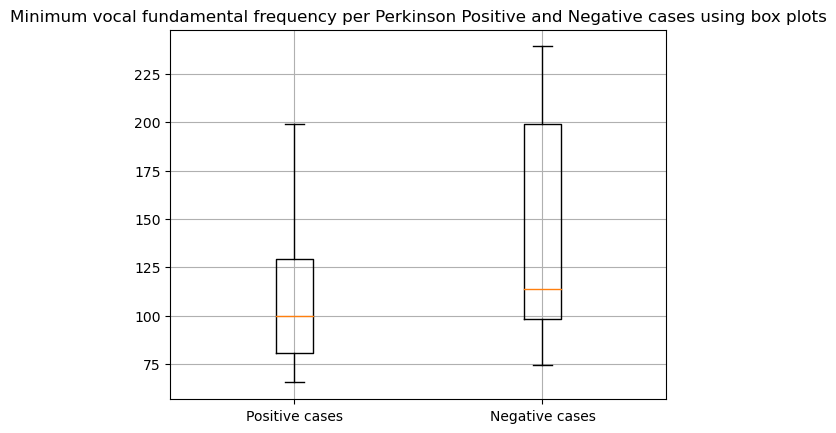

C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


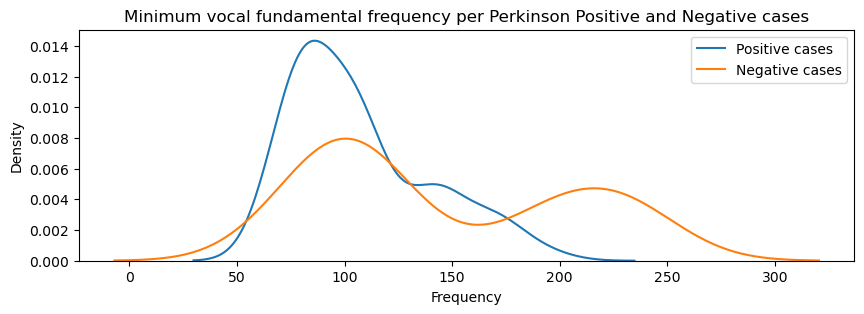

+------------+----------------+----------------+
| Percentile | Positive cases | Negative cases |
+------------+----------------+----------------+
|     0      |     65.476     |     74.287     |
|     5      |     67.66      |     78.062     |
|     10     |     75.347     |     86.521     |
|     15     |     76.761     |     90.967     |
|     20     |     79.092     |     95.322     |
|     25     |     80.876     |     98.244     |
|     30     |     84.05      |     99.945     |
|     35     |     86.87      |    103.747     |
|     40     |     90.607     |    108.238     |
|     45     |     94.549     |    109.888     |
|     50     |     99.77      |    113.938     |
|     55     |    104.352     |    117.236     |
|     60     |    106.917     |    134.221     |
|     65     |    109.755     |    192.075     |
|     70     |    112.496     |    195.448     |
|     75     |     129.24     |    199.183     |
|     80     |    140.636     |    220.607     |
|     85     |    14

In [9]:
#Minimum frequency detection
affected_freq_low= data[data['status']==1]['MDVP:Flo(Hz)'].values
not_affected_freq_low=data[data['status']==0]['MDVP:Flo(Hz)'].values
plt.boxplot([affected_freq_low,not_affected_freq_low])
plt.title('Minimum vocal fundamental frequency per Perkinson Positive and Negative cases using box plots')
plt.xticks([1,2],('Positive cases', 'Negative cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

sns.distplot(affected_freq_low, hist=False, label="Positive cases")
sns.distplot(not_affected_freq_low, hist=False, label="Negative cases")
plt.title('Minimum vocal fundamental frequency per Perkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

x=PrettyTable()
x.field_names=["Percentile","Positive cases", "Negative cases"]
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(affected_freq_low,i),3), np.round(np.percentile(not_affected_freq_low,i),3)])
print(x)

C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


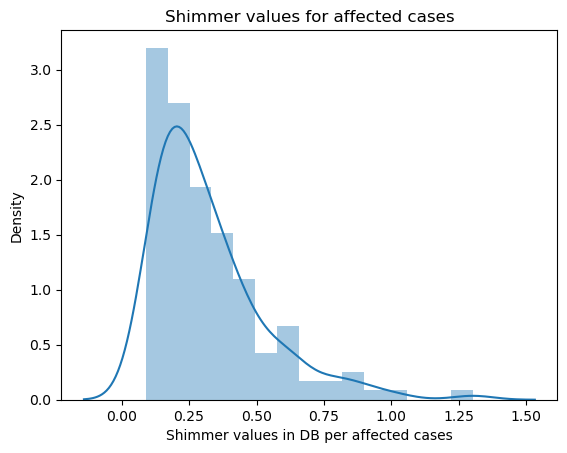

In [10]:
#Shimmer Analysis
#Affected cases
affected_MDVP = data[data['status']==1]['MDVP:Shimmer(dB)'].values
not_affected_MDVP= data[data['status']==0]['MDVP:Shimmer(dB)'].values
sns.distplot(affected_MDVP)
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()

C:\Users\Tanima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


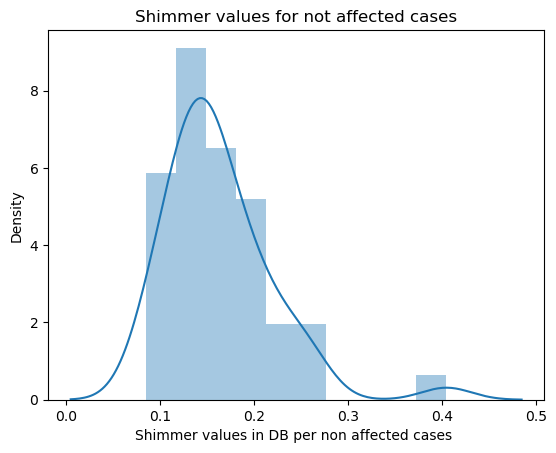

In [11]:
#Non affected cases
sns.distplot(not_affected_MDVP)
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per non affected cases ')
plt.show()

In [12]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

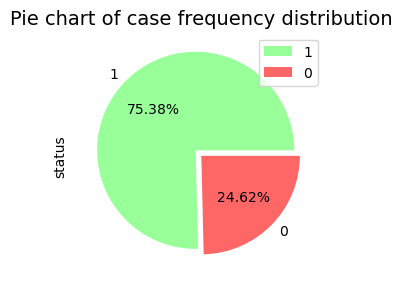

In [13]:
explode=(0.08,0)

data['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie chart of case frequency distribution",fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()


In [14]:
#sepsrating features and target data
X=data.drop(columns=['name','status'], axis=1)
Y=data['status']

In [15]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [16]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [17]:
data['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [18]:
predictors=data.drop(['name'], axis=1)
predictors=predictors.drop(['status'],axis=1)
print(predictors.columns)
target= data['status']

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
X= scaler.fit_transform(predictors)
Y= target

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25, random_state=7)

In [21]:
#Logistic Regression Model
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
#fitting data to the model
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
#summarizing the output model
print("Model :Logistic Regression")
#checking the accuracy of the model
print(metrics.accuracy_score(Y_test,y_pred)*100)
print(metrics.classification_report(Y_test,y_pred))
print(metrics.confusion_matrix(Y_test,y_pred))

Model :Logistic Regression
87.75510204081633
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.90      0.95      0.92        39

    accuracy                           0.88        49
   macro avg       0.83      0.77      0.80        49
weighted avg       0.87      0.88      0.87        49

[[ 6  4]
 [ 2 37]]


C:\Users\Tanima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


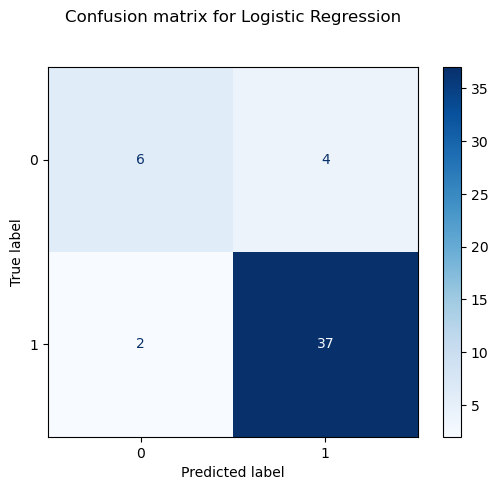

In [24]:
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

In [25]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
#make Predictions
y_pred = model.predict(X_test)
# Summarize the fit of the model
print("Gaussian Naive Bayes:")
print(metrics.accuracy_score(Y_test, y_pred)*100)
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

Gaussian Naive Bayes:
69.38775510204081
              precision    recall  f1-score   support

           0       0.38      0.80      0.52        10
           1       0.93      0.67      0.78        39

    accuracy                           0.69        49
   macro avg       0.65      0.73      0.65        49
weighted avg       0.82      0.69      0.72        49

[[ 8  2]
 [13 26]]


C:\Users\Tanima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


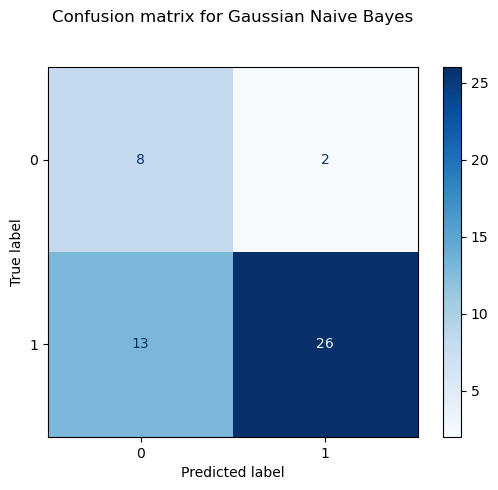

In [26]:
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Gaussian Naive Bayes', y=1.1)
plt.show()

In [27]:
# K Nearest Neighbour(Accuracy 98%)
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
#make Predictions
y_pred = model.predict(X_test)
# Summarize the fit of the model
print("K-Nearest Neighbor:")
print(metrics.accuracy_score(Y_test, y_pred)*100)
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

K-Nearest Neighbor:
97.95918367346938
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.99        39

    accuracy                           0.98        49
   macro avg       0.99      0.95      0.97        49
weighted avg       0.98      0.98      0.98        49

[[ 9  1]
 [ 0 39]]


C:\Users\Tanima\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\Tanima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tanima\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


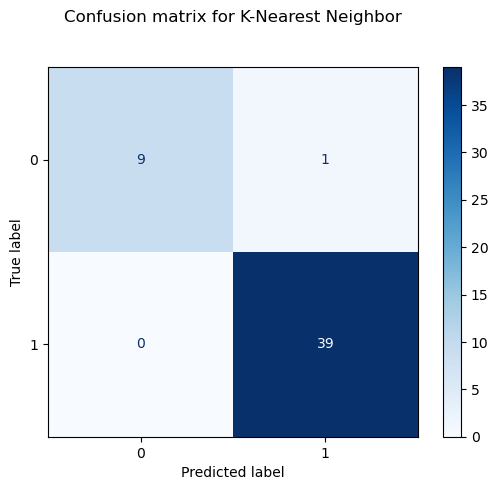

In [28]:
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for K-Nearest Neighbor', y=1.1)
plt.show()

In [29]:
# Support Vector Machine
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)
#make Predictions
y_pred = model.predict(X_test)
# Summarize the fit of the model
print("Support Vector Machine:")
print(metrics.accuracy_score(Y_test, y_pred)*100)
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

Support Vector Machine:
89.79591836734694
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.89      1.00      0.94        39

    accuracy                           0.90        49
   macro avg       0.94      0.75      0.80        49
weighted avg       0.91      0.90      0.88        49

[[ 5  5]
 [ 0 39]]


C:\Users\Tanima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


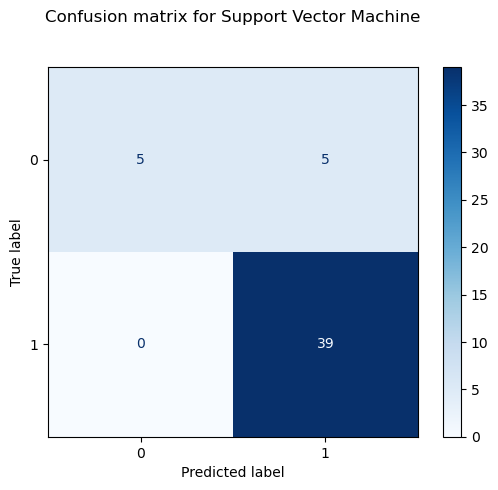

In [30]:
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Support Vector Machine', y=1.1)
plt.show()

In [31]:
# Classification and Regression Trees
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
#make Predictions
y_pred = model.predict(X_test)
# Summarize the fit of the model
print("Classification and Regression Trees:")
print(metrics.accuracy_score(Y_test, y_pred)*100)
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

Classification and Regression Trees:
95.91836734693877
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        39

    accuracy                           0.96        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.96      0.96      0.96        49

[[ 9  1]
 [ 1 38]]


C:\Users\Tanima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


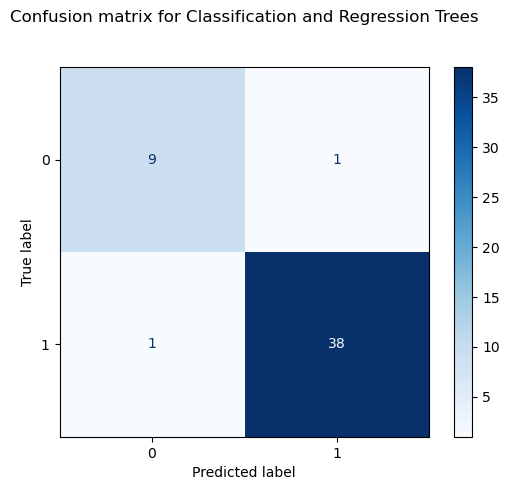

In [32]:
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Classification and Regression Trees', y=1.1)
plt.show()